# Gradients
Understanding gradients will allow us to eventually understand edge detection which we will use later on, since its an important aspect of object detection in general.

## Importing

In [1]:
import cv2
import matplotlib.pyplot as plt

## Loading the Image

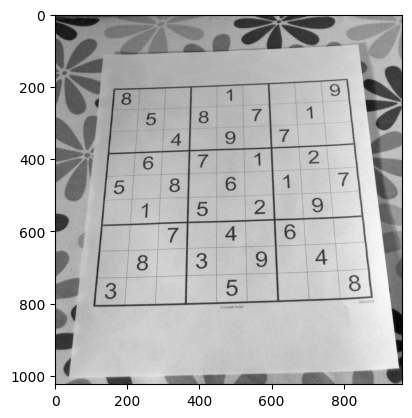

In [2]:
img = cv2.imread("../DATA/sudoku.jpg", 0)
plt.imshow(img, cmap="gray")

## Sobel Derivatives

Sobel operators is a joint Gaussian smoothing plus differentiation operation, so it is more resistant to noise. You can specify the direction of derivatives to be taken, vertical or horizontal (by the arguments, yorder and xorder respectively). You can also specify the size of kernel by the parameter ksize. 

$$
G_{x} = \begin{bmatrix}-1 & 0 & +1 \\  -2 & 0 & +2 \\  -1 & 0 & +1\end{bmatrix} \quad \text{and} \quad G_{y} = \begin{bmatrix}-1 & -2 & -1 \\  0 & 0 & 0 \\  +1 & +2 & +1\end{bmatrix}
$$

---

`cv2.Sobel(Mat src, int ddepth, int dx, int dy, Mat dst=None, int ksize=3, double scale=1, double delta=0, int borderType=BORDER_DEFAULT)`

**Description:** Calculates the first, second, third, or mixed image derivatives using an extended Sobel operator.

**Parameters:**

`src`: Input image.

`ddepth`: Output image depth

`dx`: Order of the derivative x.

`dy`: Order of the derivative y.

`dst`: Output image of the same size and the same number of channels as src.

`ksize`: Size of the extended Sobel kernel; it must be 1, 3, 5, or 7.

`scale`: Optional scale factor for the computed derivative values; by default, no scaling is applied.

`delta`: Optional delta value that is added to the results prior to storing them in dst.

`borderType`: It depicts what kind of border to be added.

* `BORDER_CONSTANT`: `iiiiii|abcdefgh|iiiiiii` with some specified `i`
* `BORDER_REPLICATE`: `aaaaaa|abcdefgh|hhhhhhh`
* `BORDER_REFLECT`: `fedcba|abcdefgh|hgfedcb`
* `BORDER_WRAP`: `cdefgh|abcdefgh|abcdefg`
* and a few more...

**Return Value:** It returns an image.

---


### Detect only vertical edges

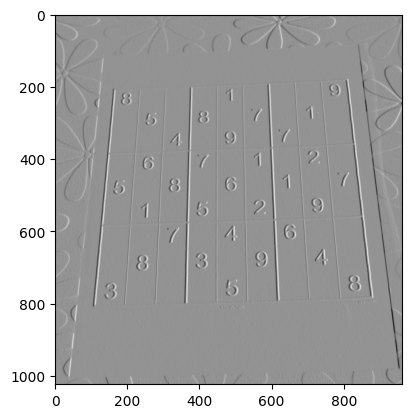

In [3]:
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
plt.imshow(sobelx, cmap="gray")

### Detect only horizontal edges

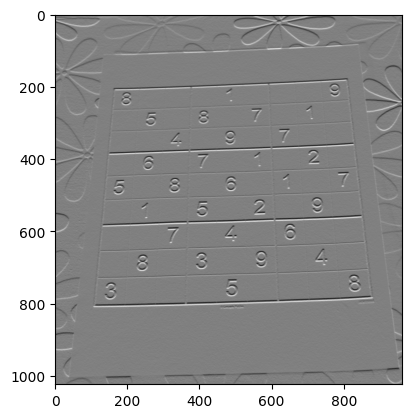

In [4]:
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
plt.imshow(sobely, cmap="gray")

### Detect all edges

Combine the previous results.

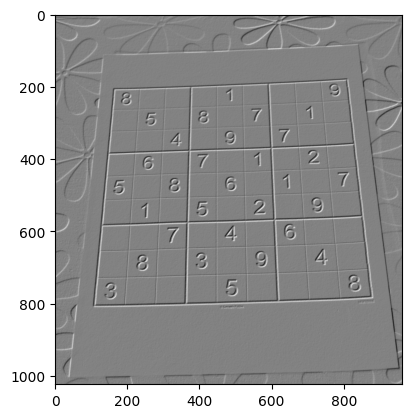

In [5]:
blended = cv2.addWeighted(src1=sobelx, alpha=0.5, src2=sobely, beta=0.5, gamma=0)
plt.imshow(blended, cmap="gray")

## Scharr Derivatives

We could also use the Scharr kernel instead of the Sobel kernel which may give us better approximations to the gradient:

$$
G_{x} = \begin{bmatrix}+3 & 0 & -3 \\  +10 & 0 & -10 \\  +3 & 0 & -3\end{bmatrix} \quad   \text{and}   \quad G_{y} = \begin{bmatrix}+3 & +10 & +3 \\  0 & 0 & 0 \\  -3 & -10 & -3\end{bmatrix}
$$

The exact reasons as to why the Scharr kernel could lead to better approximations are heavily rooted in mathematical details and are well outside our discussion of image gradients.

---

`cv2.Scharr(Mat src, int ddepth, int dx, int dy, Mat dst=None, double scale=1, double delta=0, int borderType=BORDER_DEFAULT)`

**Description:** Calculates the first x- or y- image derivative using Scharr operator.

**Parameters:**

`src`: Input image.

`ddepth`: Output image depth

`dx`: Order of the derivative x.

`dy`: Order of the derivative y.

`dst`: Output image of the same size and the same number of channels as src.

`scale`: Optional scale factor for the computed derivative values; by default, no scaling is applied.

`delta`: Optional delta value that is added to the results prior to storing them in dst.

`borderType`: It depicts what kind of border to be added.

* `BORDER_CONSTANT`: `iiiiii|abcdefgh|iiiiiii` with some specified `i`
* `BORDER_REPLICATE`: `aaaaaa|abcdefgh|hhhhhhh`
* `BORDER_REFLECT`: `fedcba|abcdefgh|hgfedcb`
* `BORDER_WRAP`: `cdefgh|abcdefgh|abcdefg`
* and a few more...

**Return Value:** It returns an image.

**Note:** The call

`Scharr(src, ddepth, dx, dy, dst, scale, delta, borderType)`

is equivalent to

`Sobel(src, ddepth, dx, dy, dst, cv2.FILTER_SCHARR, scale, delta, borderType)`.

---

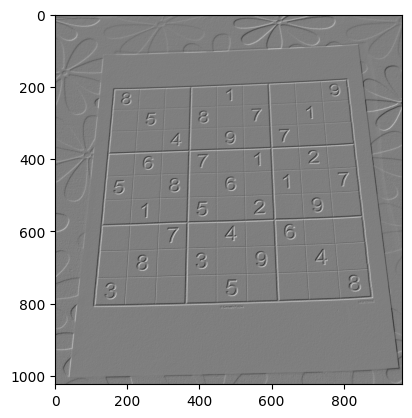

In [6]:
scharrx = cv2.Scharr(img, cv2.CV_64F, 1, 0)
scharry = cv2.Scharr(img, cv2.CV_64F, 0, 1)
blended = cv2.addWeighted(src1=scharrx, alpha=0.5, src2=scharry, beta=0.5, gamma=0)
plt.imshow(blended, cmap="gray")

## Laplacian Derivatives

It calculates the Laplacian of the image given by the relation:
$$ \Delta src = \frac{\partial^2 src}{\partial x^2} + \frac{\partial^2 src}{\partial y^2} $$
where each derivative is found using Sobel derivatives.

---

`cv2.Laplacian(Mat src, int ddepth, Mat dst=None, int ksize=1, double scale=1, double delta=0, int borderType=BORDER_DEFAULT)`

**Description:** Calculates the Laplacian of an image.

**Parameters:**

`src`: Input image.

`ddepth`: Output image depth

`dst`: Output image of the same size and the same number of channels as src.

`ksize`: Aperture size used to compute the second-derivative filters. 

`scale`: Optional scale factor for the computed derivative values; by default, no scaling is applied.

`delta`: Optional delta value that is added to the results prior to storing them in dst.

`borderType`: It depicts what kind of border to be added.

* `BORDER_CONSTANT`: `iiiiii|abcdefgh|iiiiiii` with some specified `i`
* `BORDER_REPLICATE`: `aaaaaa|abcdefgh|hhhhhhh`
* `BORDER_REFLECT`: `fedcba|abcdefgh|hgfedcb`
* `BORDER_WRAP`: `cdefgh|abcdefgh|abcdefg`
* and a few more...

**Return Value:** It returns an image.

---

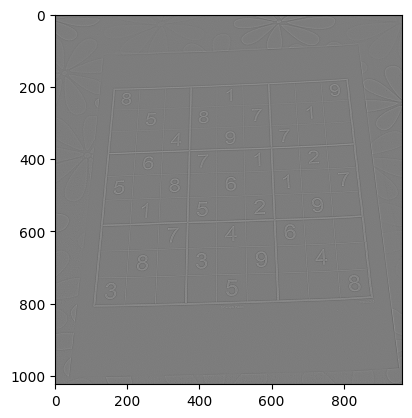

In [7]:
laplacian = cv2.Laplacian(img, cv2.CV_64F)
plt.imshow(laplacian, cmap="gray")